# Práctica 6

In [3]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("datos_practica6.csv", sep=";")
df.head()

,x1,x2,y
0,3.89,-6.57,2
1,2.34,3.86,1
2,-3.09,1.36,0
3,-4.16,1.70,0
4,1.48,1.16,1


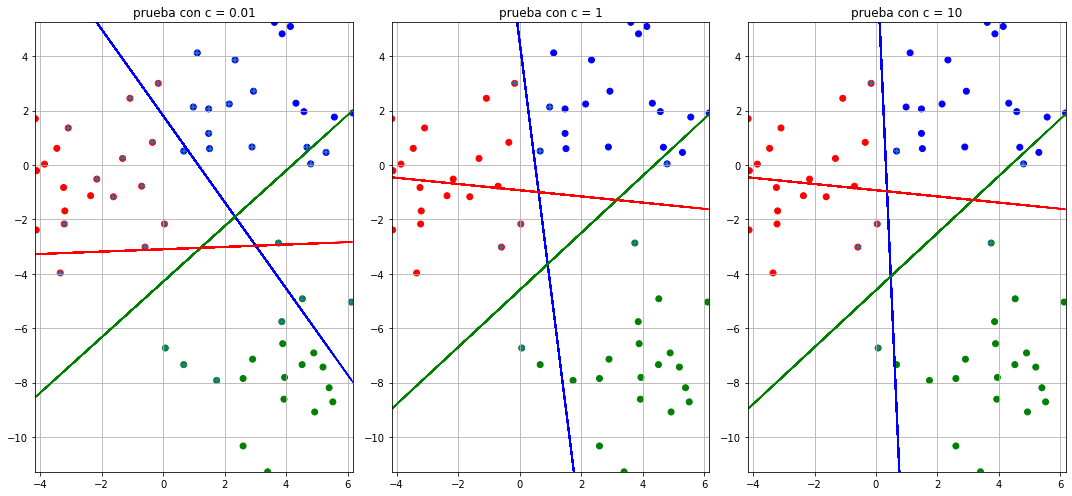

In [5]:
x1x2 = df[df.columns[0:2]]
x1 = df[df.columns[0]]
x2 = df[df.columns[1]]
y = df[df.columns[2]]

def colorfunc(value):
    if value == 2: return "green"
    if value == 1: return "blue"
    if value == 0: return "red"


color = [colorfunc(value)  for value in y]

fig = plt.figure(figsize=(10, 10))
c = [0.01,1,10]
ax1 = plt.subplot(1, 3, 1)
ax1.set_xlim(left=min(x1), right=max(x1))
ax1.set_ylim(bottom=min(x2), top=max(x2))

for i in range(3):

    model = SVC(kernel='linear',C=c[i]).fit(x1x2,y)

    plt.subplot(1, 3, i+1, sharey=ax1, sharex=ax1)
    fig.set_figheight(7)
    fig.set_figwidth(15)

    plt.title("prueba con c = " + str(c[i]))
    plt.scatter(x1,x2, color=color)
    plt.scatter([x1[i] for i in model.support_.tolist()],[x2[i] for i in  model.support_.tolist()],marker="+")


    slope = -(model.coef_[0][0]/model.coef_[0][1])
    intercept = -model.intercept_[0]/model.coef_[0][1]
    Y = (slope*x1) + intercept
    plt.plot(x1, Y, color = "blue")

    slope = -(model.coef_[1][0]/model.coef_[1][1])
    intercept = -model.intercept_[1]/model.coef_[1][1]
    Y = (slope*x1) + intercept
    plt.plot(x1, Y, color = "green")


    slope = -(model.coef_[2][0]/model.coef_[2][1])
    intercept = -model.intercept_[2]/model.coef_[2][1]
    Y = (slope*x1) + intercept
    plt.plot(x1, Y, color = "red")

    plt.grid()

plt.tight_layout()
plt.show()

Como podemos observar a mayor c, mejor separa las muestras. Además como es lógico las muestras de soporte están cerca de las rectas.

In [6]:
df_train = pd.read_csv("CelebA-10K-train.csv", sep=",")
df_test = pd.read_csv("CelebA-10K-test.csv", sep=",")
trainy = df_train.iloc[: , 1]
trainx = df_train.iloc[: , 2:]
testy = df_test.iloc[:,1]
testx = df_test.iloc[:,2:]


In [7]:
xtrain_new, xtest_new, ytrain_new, ytest_new = train_test_split(trainx,trainy,train_size=0.8)

In [8]:
modelos = ["linear","poly","rbf"]
c=[0.01,1,10]
dic = {}
for modelo in modelos:
    for i in range(3):
        model = SVC(kernel=modelo,C=c[i]).fit(xtrain_new,ytrain_new)
        dic[modelo + " con c = " + str(c[i])] = accuracy_score(ytest_new, model.predict(xtest_new))


In [9]:
print("El mejor modelo es: " + str(max(zip(dic.values(), dic.keys()))[1]))


El mejor modelo es: rbf con c = 10


In [10]:
best_model = SVC(kernel="rbf",C=10).fit(xtrain_new,ytrain_new)
print("El conjunto de test que no utilizamos da de restulado: " + str(accuracy_score(best_model.predict(testx),testy)))

El conjunto de test que no utilizamos da de restulado: 0.9492


In [11]:
from os import listdir
from os.path import isfile, join

mypath=".\ImagenesParaClasificar"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
newdf = df_test.loc[df_test['Image_name'].isin(onlyfiles)]

new_y = newdf.iloc[:,1]
new_x= newdf.iloc[:,2:]
print("Clasifica correctamente "+str(sum(np.equal(best_model.predict(new_x),new_y))) +" muestras, no concuerda con la tasa de acierto de un 94.64% ya que son en total 8 muestras en este test, pero no es importante pues este es un caso concreto.")

Clasifica correctamente 7 muestras, no concuerda con la tasa de acierto de un 94.64% ya que son en total 8 muestras en este test, pero no es importante pues este es un caso concreto.


La cantidad de muestras del test final acertadas es menor pero el porcentaje de acierto que es más importante es mayor.